Import Necessary Modules

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Load the csv file and print the data frame

In [78]:
df = pd.read_csv('C:\\Users\\sraks\\AIML Internship\\K Means\\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Plot a scatter plot for clustering

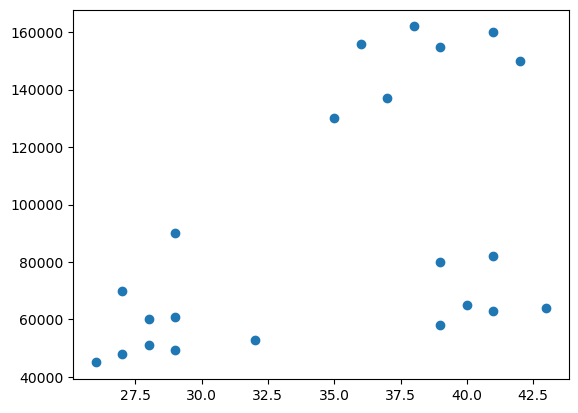

In [79]:
plt.scatter(df['Age'], df['Income($)'])

Specify clusters and create kmean object

In [80]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

Fit and Predict

In [81]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

Concatinate cluster to actual df

In [82]:
df['cluster']= y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


Create DataFrames for the clusters

In [83]:
c1 = df[df.cluster==0]
c2 = df[df.cluster==1]
c3 = df[df.cluster==2]

Plot a scatter plot for the clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


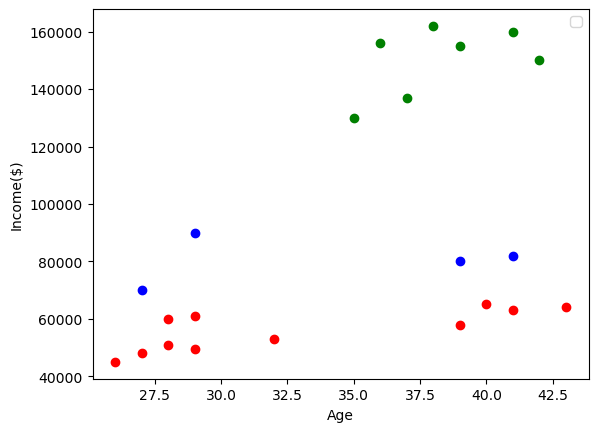

In [84]:
plt.scatter(c1.Age, c1['Income($)'], color="Red")
plt.scatter(c2.Age, c2['Income($)'], color="Green")
plt.scatter(c3.Age, c3['Income($)'], color="Blue")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

Use min max scaler for proper scaling

In [87]:
scaler= MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [88]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [89]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [91]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

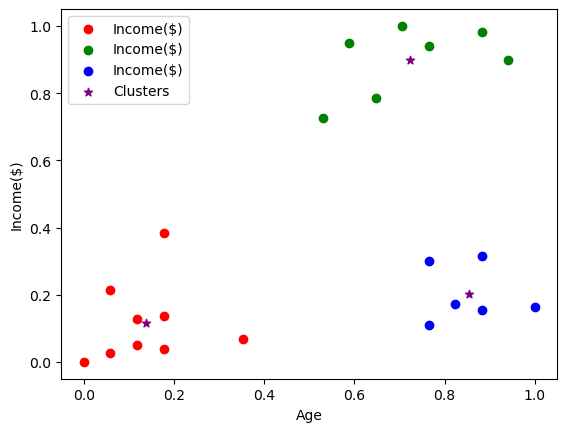

In [98]:
c1 = df[df.cluster==0]
c2 = df[df.cluster==1]
c3 = df[df.cluster==2]

plt.scatter(c1.Age, c1['Income($)'], color="Red", label = "Income($)")
plt.scatter(c2.Age, c2['Income($)'], color="Green", label = "Income($)")
plt.scatter(c3.Age, c3['Income($)'], color="Blue", label = "Income($)")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker = "*", label = "Clusters")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

Elbow plot method

In [107]:
k_range = range(1,10)
sse = []
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sraks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [108]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2755825568722976,
 0.224620705604351,
 0.16869711728567788,
 0.13976844995388155,
 0.10188787724979424]

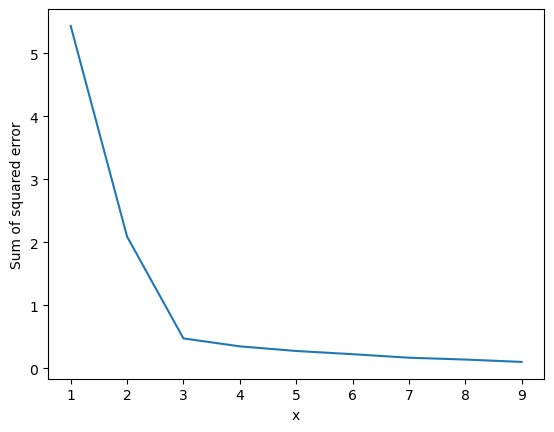

In [110]:
plt.xlabel('x')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)